In [40]:
# Function to import data
import pandas as pd
def load_player_data():
    return (pd.read_csv('player_stats.csv'))

In [41]:
# Importing the data
player_data = load_player_data()

In [42]:
# Removing string attributes of data
# Improvement could be to try to turn these into numerical ie. win\loss record of team, 1-5 position.
# Also removing percentages after some consideration because they are redundant when you have attemps and makes
# Also percentages were found to not be the most important stat, so I think they may be clouding the data
player_data.drop(["Player", "Pos", "Tm", "FG%", "3P%", "2P%", "eFG%", "FT%"], axis=1, inplace=True) 

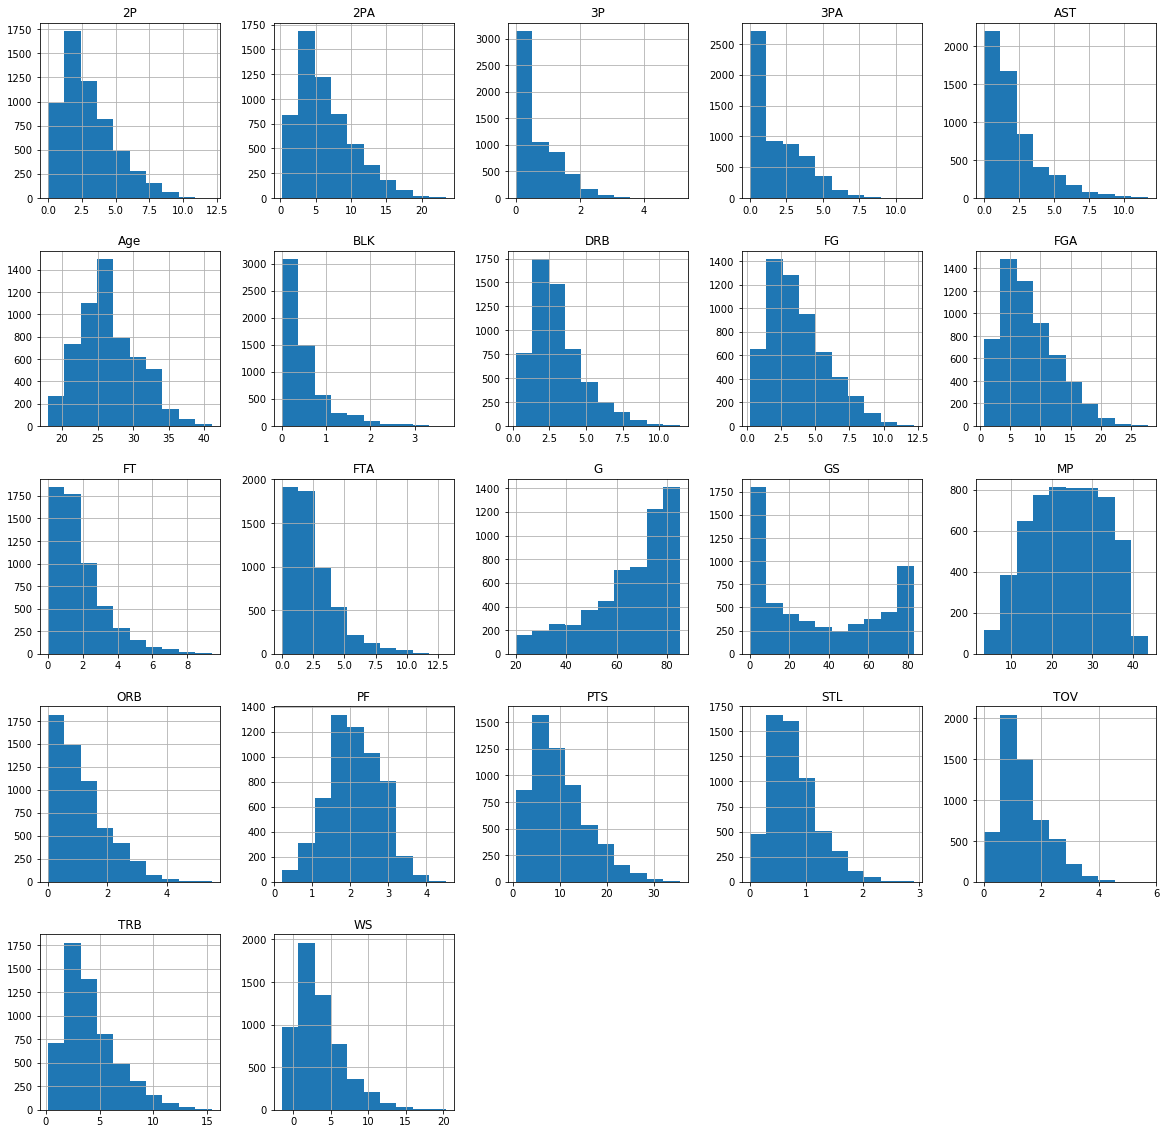

In [43]:
# Histograms of features for visualisation
import matplotlib.pyplot as plt
player_data.hist(figsize=(20,20))
plt.show()

In [44]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(player_data, test_size=0.2, random_state=69)

In [45]:
# Showing correlation between each factor and Win Shares
# Note: this does not tell the whole story, as according to bayesian inference, these factors affect eachother differently when combined
stat_correlation = training_data.corr()
stat_correlation["WS"].sort_values(ascending=False)

WS     1.000000
PTS    0.625282
FTA    0.615270
FT     0.613500
FG     0.612962
2P     0.592198
MP     0.575869
FGA    0.564963
2PA    0.558177
DRB    0.531253
TOV    0.511533
GS     0.505632
TRB    0.497067
STL    0.458123
AST    0.404202
ORB    0.346574
PF     0.329681
BLK    0.323995
G      0.314008
3P     0.213282
3PA    0.211296
Age   -0.074048
Name: WS, dtype: float64

In [51]:
# Data was cleaned in web scraper, all that needs to be done is standardize
# nan to num because there was overflow from float64 somehow
from sklearn.preprocessing import StandardScaler
import numpy as np
training_stats = training_data.drop("WS", axis=1)
training_labels = training_data["WS"].copy()

test_stats = test_data.drop("WS", axis=1)
test_labels = test_data["WS"].copy()

prepared_data = StandardScaler().fit_transform(training_stats)

prepared_data = np.nan_to_num(prepared_data)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
# Train model
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(prepared_data, training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# Standardise and generate predictions on test set
prepared_test = StandardScaler().fit_transform(test_stats)
prepared_test = np.nan_to_num(prepared_test)

prediction = linear_reg.predict(prepared_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
# Get rmse of predictions
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_labels, prediction))
rmse

2.011348051071609